In [1]:
%matplotlib inline

import os

import IPython.display as ipd
from IPython.display import clear_output

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
from tqdm import tqdm

from collections import OrderedDict

plt.rcParams['figure.figsize'] = (17, 5)

In [2]:
os.sys.path.append("/home/koltochenkoja/GEN/generative_project/fma/")
import utils

# Gain metainfo

In [3]:
AUDIO_DIR = "/home/koltochenkoja/GEN/generative_project/fma/data/fma_small"

# Load metadata and features.
tracks = utils.load('/home/koltochenkoja/GEN/generative_project/fma/data/fma_metadata/tracks.csv')
genres = utils.load('/home/koltochenkoja/GEN/generative_project/fma/data/fma_metadata/genres.csv')

tracks.shape, genres.shape, 

((106574, 52), (163, 4))

In [4]:
small = tracks[tracks['set', 'subset'] <= 'small']

In [5]:
genres.top_level.value_counts()

top_level
2       30
12      29
15      19
38      19
20      12
21       8
5        8
4        7
9        6
17       6
1235     5
14       4
13       4
10       3
3        2
8        1
Name: count, dtype: int64

In [6]:
small.track[['duration', 'genre_top', 'genres', 'genres_all']]

duration genre_top          genres      genres_all
track_id                                                    
2              168   Hip-Hop            [21]            [21]
5              206   Hip-Hop            [21]            [21]
10             161       Pop            [10]            [10]
140            253      Folk            [17]            [17]
141            182      Folk            [17]            [17]
...            ...       ...             ...             ...
154308         194   Hip-Hop  [21, 539, 811]  [811, 539, 21]
154309         162   Hip-Hop  [21, 539, 811]  [811, 539, 21]
154413         349       Pop            [76]        [10, 76]
154414         346       Pop            [76]        [10, 76]
155066         252   Hip-Hop       [21, 811]       [811, 21]

[8000 rows x 4 columns]

In [7]:
small.track['genre_top'].value_counts()

genre_top
Hip-Hop                1000
Folk                   1000
Experimental           1000
Electronic             1000
Pop                    1000
Rock                   1000
International          1000
Instrumental           1000
Blues                     0
Classical                 0
Country                   0
Easy Listening            0
Old-Time / Historic       0
Jazz                      0
Soul-RnB                  0
Spoken                    0
Name: count, dtype: int64

In [8]:

genre_to_index = {k:i for i, (k, v) in enumerate(small.track['genre_top'].value_counts().to_dict().items()) if v > 0}
genre_to_index

{'Hip-Hop': 0,
 'Folk': 1,
 'Experimental': 2,
 'Electronic': 3,
 'Pop': 4,
 'Rock': 5,
 'International': 6,
 'Instrumental': 7}

In [9]:
small[small.track['genre_top'] == "Instrumental"]

album                                                             \
         comments        date_created date_released       engineer favorites   
track_id                                                                       
10250           0 2009-04-09 07:19:43           NaT            NaN         0   
11638           0 2009-04-28 11:45:55    2009-02-12            NaN         8   
14568           3 2009-06-06 09:50:11    2009-01-01            NaN         5   
14569           3 2009-06-06 09:50:11    2009-01-01            NaN         5   
14570           3 2009-06-06 09:50:11    2009-01-01            NaN         5   
...           ...                 ...           ...            ...       ...   
150268          3 2017-01-27 20:13:46           NaT            NaN         3   
152480          1 2016-07-25 11:19:00           NaT  Andy G. Cohen         5   
152568          0 2017-02-15 15:49:58           NaT            NaN         1   
152569          0 2017-02-15 15:49:58           NaT            NaN         1   
152570          0 2017-02-15 15:49:58           NaT            NaN         1   

                                                                            \
             id                                        information listens   
track_id                                                                     
10250      2524                                                NaN   16695   
11638      2853                                                NaN   13103   
14568      3371  <p>Instrumental music from the forthcoming 10 ...  127584   
14569      3371  <p>Instrumental music from the forthcoming 10 ...  127584   
14570      3371  <p>Instrumental music from the forthcoming 10 ...  127584   
...         ...                                                ...     ...   
150268    22402                                                NaN   18392   
152480    21144  <p>MUL / DIV is my newest album, which I am cu...   85939   
152568    22647                                                NaN   16456   
152569    22647                                                NaN   16456   
152570    22647                                                NaN   16456   

                                                                            \
               producer                                               tags   
track_id                                                                     
10250               NaN                                                 []   
11638               NaN                                                 []   
14568               NaN                                                 []   
14569               NaN                                                 []   
14570               NaN                                                 []   
...                 ...                                                ...   
150268              NaN                                                 []   
152480    Andy G. Cohen  [background music, emotional, art rock, post r...   
152568              NaN                                                 []   
152569              NaN                                                 []   
152570              NaN                                                 []   

          ...                                              track           \
          ...                                        information interest   
track_id  ...                                                               
10250     ...                                                NaN     7400   
11638     ...                                                NaN     3620   
14568     ...                                                NaN    15064   
14569     ...                                                NaN    12282   
14570     ...                                                NaN     7371   
...       ...                                                ...      ...   
150268    ..

In [10]:
small.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

In [11]:
filename = utils.get_audio_path(AUDIO_DIR, 10250)
print('File: {}'.format(filename))

x, sr = librosa.load(filename, sr=None, duration=76, mono=True)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 7, 17
# ipd.Audio(data=x[start*sr:end*sr], rate=sr)
ipd.Audio(data=x, rate=sr)

File: /home/koltochenkoja/GEN/generative_project/fma/data/fma_small/010/010250.mp3
Duration: 29.98s, 1321967 samples


In [12]:
small.track[['duration', 'genre_top']].index

Index([     2,      5,     10,    140,    141,    148,    182,    190,    193,
          194,
       ...
       153956, 154303, 154305, 154306, 154307, 154308, 154309, 154413, 154414,
       155066],
      dtype='int64', name='track_id', length=8000)

In [13]:
small.track.loc[2, ['duration', 'genre_top']]

duration         168
genre_top    Hip-Hop
Name: 2, dtype: object

In [14]:
for i in small.track[['duration', 'genre_top']].index:
    row = small.track.loc[i, ['duration', 'genre_top']]
    print(row.genre_top, row.duration)
    break

Hip-Hop 168


In [15]:
import torch
import torch.nn as nn
import torch.utils.data as torch_data

In [16]:
PIECE_LEN = 2**15*6 # применро 4,45 сек


class Dataset(torch_data.Dataset):
    def __init__(self, data: pd.DataFrame):
        self.wav = []
        self.genres = []

        self.genre_to_index = {k:i for i, (k, v) in enumerate(small.track['genre_top'].value_counts().to_dict().items()) if v > 0}
        self.index_to_genre = {v:k for k, v in self.genre_to_index.items()}


        for i in tqdm(data.track[['duration', 'genre_top']].index):
            row = data.track.loc[i, ['duration', 'genre_top']]
            filename = utils.get_audio_path(AUDIO_DIR, i)   
            try:
                x, sr = librosa.load(filename, sr=None, duration=row.duration, mono=True)
                
                if sr != 44100 or len(x) < PIECE_LEN:
                    continue
                self.wav.append(x)
                self.genres.append(self.genre_to_index[row.genre_top])
            except:
                print(f"File {i} is broken")

    def __getitem__(self, index):
        start = np.random.choice(len(self.wav[index]) - PIECE_LEN, size=1)[0] 
        return self.wav[index][start: start + PIECE_LEN], self.genres[index]

    def __len__(self) -> int:
        return len(self.wav)


def collate_fn(batch) -> tuple[torch.Tensor, torch.Tensor]:
    arr = np.array([item[0] for item in batch])
    wav = torch.tensor(arr, dtype=torch.float)
    g = np.array([item[1] for item in batch])
    genres = torch.tensor(g, dtype=torch.int)

    return (wav, genres)

In [17]:
dataset = Dataset(small)

 28%|███████████                            | 2265/8000 [02:15<05:59, 15.95it/s][src/libmpg123/layer3.c:INT123_do_layer3():1771] error: part2_3_length (3360) too large for available bit count (3240)
[src/libmpg123/layer3.c:INT123_do_layer3():1771] error: part2_3_length (3328) too large for available bit count (3240)
 55%|█████████████████████▌                 | 4423/8000 [04:24<03:29, 17.04it/s]Note: Illegal Audio-MPEG-Header 0x00000000 at offset 33361.
Note: Trying to resync...
/tmp/ipykernel_470592/4201414493.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(filename, sr=None, duration=row.duration, mono=True)
/home/koltochenkoja/GEN/generative_project/project/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Note: Skipped 1024 bytes in inpu

File 99134 is broken


 61%|███████████████████████▉               | 4902/8000 [04:53<03:04, 16.75it/s]/tmp/ipykernel_470592/4201414493.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(filename, sr=None, duration=row.duration, mono=True)
/home/koltochenkoja/GEN/generative_project/project/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
[src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
 61%|███████████████████████▉               | 4906/8000 [04:54<03:18, 15.60it/s]

File 108925 is broken


 87%|█████████████████████████████████▉     | 6965/8000 [06:58<01:02, 16.66it/s][src/libmpg123/parse.c:do_readahead():1099] warning: Cannot read next header, a one-frame stream? Duh...
/tmp/ipykernel_470592/4201414493.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(filename, sr=None, duration=row.duration, mono=True)
/home/koltochenkoja/GEN/generative_project/project/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
 87%|█████████████████████████████████▉     | 6969/8000 [06:58<01:04, 16.03it/s]

File 133297 is broken


100%|███████████████████████████████████████| 8000/8000 [08:01<00:00, 16.61it/s]


In [18]:
for i in range(5):
    x, g = dataset[0]
    print(x[0])

-0.017855551
-0.010765867
0.07824614
-0.072333276
0.078873426


In [19]:
class ConvNextBlock(nn.Module):
    def __init__(self, input_channels, hidden_size, kernel_size):
        super(ConvNextBlock, self).__init__()

        self.net = nn.Sequential(
            OrderedDict([
                ('conv_1', nn.Conv1d(input_channels, input_channels, kernel_size=kernel_size, padding=kernel_size//2)),
                ('ln', nn.InstanceNorm1d(input_channels)),
                ('conv_2', nn.Conv1d(input_channels, hidden_size, kernel_size=1, padding=0)),
                ('gelu', nn.GELU()),
                ('conv_3', nn.Conv1d(hidden_size, input_channels, kernel_size=1, padding=0)),
            ])
        )
    def forward(self, x):
        return x + self.net(x)


class MyBlock(nn.Module):
    def __init__(self, input_channels, output_channels, downsampling=True):
        super(MyBlock, self).__init__()

        layers = []
        if not downsampling:
            layers.append(
                nn.ConvTranspose1d(
                    in_channels=input_channels,
                    out_channels=output_channels,
                    kernel_size=3, stride=2, dilation=2, output_padding=1, padding=2
                )
            )
        else:
            layers.append(
                nn.Conv1d(
                    in_channels=input_channels,
                    out_channels=output_channels,
                    kernel_size=3, stride=2, padding=1
                )
            )
        layers.append(nn.InstanceNorm1d(output_channels))
        layers.append(nn.GELU())
        
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)

In [20]:
class Encoder(nn.Module):
    def __init__(self, encoder_hidden, final_size):
        super(Encoder, self).__init__()
        # Encoder: (1, L = 2**15 * 6) -> (256, L = 2**8 * 3)  -- 8 сжатий
        self.encoder = nn.Sequential(
            MyBlock(input_channels=1, output_channels=8, downsampling=True),
            MyBlock(input_channels=8, output_channels=32, downsampling=True),
            MyBlock(input_channels=32, output_channels=encoder_hidden, downsampling=True),

            ConvNextBlock(input_channels=encoder_hidden, hidden_size=384, kernel_size=7),
            nn.MaxPool1d(kernel_size=2),

            ConvNextBlock(input_channels=encoder_hidden, hidden_size=384, kernel_size=7),
            nn.MaxPool1d(kernel_size=2),

            ConvNextBlock(input_channels=encoder_hidden, hidden_size=384, kernel_size=7),
            nn.MaxPool1d(kernel_size=2),

            ConvNextBlock(input_channels=encoder_hidden, hidden_size=384, kernel_size=7),
            nn.MaxPool1d(kernel_size=2),

            ConvNextBlock(input_channels=encoder_hidden, hidden_size=384, kernel_size=7),
            nn.MaxPool1d(kernel_size=2),
            
        )
        self.mean = nn.Conv1d(
                    in_channels=encoder_hidden,
                    out_channels=final_size,
                    kernel_size=3, padding=1
                )
        self.logvar = nn.Conv1d(
                    in_channels=encoder_hidden,
                    out_channels=final_size,
                    kernel_size=3, padding=1
                )
    @staticmethod
    def reparametrize(mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def forward(self, inputs):        
        # Encoded feature map
        hidden = self.encoder(inputs)
        # Calculate mean and (log)variance
        mean, logvar = self.mean(hidden), self.logvar(hidden)
        # Sample
        latent_z = self.reparametrize(mean, logvar)
        return latent_z, mean, logvar


class Decoder(nn.Module):
    def __init__(self, encoder_hidden, final_size):
        super(Decoder, self).__init__()

        self.decoder = nn.Sequential(
            nn.Conv1d(
                    in_channels=final_size,
                    out_channels=encoder_hidden,
                    kernel_size=3, padding=1
            ),
            nn.Upsample(scale_factor=2),
            ConvNextBlock(input_channels=encoder_hidden, hidden_size=384, kernel_size=7),
            
            nn.Upsample(scale_factor=2),
            ConvNextBlock(input_channels=encoder_hidden, hidden_size=384, kernel_size=7),
            
            nn.Upsample(scale_factor=2),
            ConvNextBlock(input_channels=encoder_hidden, hidden_size=384, kernel_size=7),

            nn.Upsample(scale_factor=2),
            ConvNextBlock(input_channels=encoder_hidden, hidden_size=384, kernel_size=7),

            nn.Upsample(scale_factor=2),
            ConvNextBlock(input_channels=encoder_hidden, hidden_size=384, kernel_size=7),

            MyBlock(input_channels=encoder_hidden, output_channels=32, downsampling=False),
            MyBlock(input_channels=32, output_channels=8, downsampling=False),
            MyBlock(input_channels=8, output_channels=1, downsampling=False),
            nn.Conv1d(
                    in_channels=1,
                    out_channels=1,
                    kernel_size=3, padding=1
            ),
        )

    def forward(self, input):
        return self.decoder(input)

class VAE(nn.Module):
    def __init__(self, encoder, decoder, final_size, genres_size=8, is_train=True, ):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = encoder
        # Decoder
        self.decoder = decoder
        self.genre_embed = nn.Embedding(num_embeddings=genres_size, embedding_dim=final_size)
        self.final_size = final_size

        if is_train == False:
            for param in self.encoder.parameters():
                param.requires_grad = False
            for param in self.decoder.parameters():
                param.requires_grad = False

    def forward(self, x, genres):
        latent_z, mean, logvar = self.encoder(x)
        genre_embed = self.genre_embed(genres)
        rec_x = self.decoder(latent_z + genre_embed.unsqueeze(dim=-1))
        return rec_x, mean, logvar
    
    def encode(self, x):
        latent_z, _, _ = self.encoder(x)
        return latent_z
        
    @staticmethod
    def reparametrize(mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def sample(self, batch_size, genres=None, length=2**8 * 3):
        if not genres:
            genres = torch.randint(low=0, high=8, size=[batch_size], dtype=torch.long, device=device)
        genre_embed = self.genre_embed(genres)
        sample = torch.randn(size=[batch_size, self.final_size, length]).to(device) + genre_embed.unsqueeze(dim=-1)
        return self.decoder(sample)


In [40]:
encoder_hidden = 96
final_size = 128

encoder = Encoder(encoder_hidden, final_size)
decoder = Decoder(encoder_hidden, final_size)
model = VAE(encoder, decoder, final_size)
print(f"Model has {sum([p.numel() for p in model.parameters()])} parameters")


Model has 1520325 parameters


In [22]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="7"

device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
print(torch.cuda.get_device_properties(device))
torch.cuda.mem_get_info(device)

_CudaDeviceProperties(name='NVIDIA GeForce RTX 3060', major=8, minor=6, total_memory=12044MB, multi_processor_count=28)


(11723407360, 12629508096)

In [41]:
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

In [24]:
torch.randint(low=0, high=8, size=[1], dtype=torch.long, device=device)

tensor([1], device='cuda:0')

# train VAE

In [33]:
import torch.nn.functional as F

def loss_function(recon_x, x, mu, logvar):
    batch_size = recon_x.shape[0]
    ffts = [1024, 2048, 512]
    window_sizes = [600, 1200, 240]
    frame_shifts = [120, 240, 50]
    rec_loss = torch.zeros(1, device=device)
    
    for i in range(3):
        window = torch.hann_window(window_sizes[i], device=device)
        y_pred = torch.abs(torch.stft(recon_x[:, 0, :], ffts[i], hop_length=frame_shifts[i], win_length=window_sizes[i], window=window, return_complex=True))
        y_true = torch.abs(torch.stft(x[:, 0, :], ffts[i], hop_length=frame_shifts[i], win_length=window_sizes[i], window=window, return_complex=True))
        rec_loss += F.mse_loss(y_pred, y_true, reduction='sum') #/ torch.square(torch.sum(y_true**2))
    
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return rec_loss, KLD

log_interval=10
epochs=10


def train(pbar, model, optimizer):
    model.train()
    train_mse, train_kld, train_loss = 0, 0, 0
    
    for batch_idx, (data, genre) in enumerate(dataloader):
        data = data.to(device).unsqueeze(dim=1)
        genre = genre.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data, genre)
        mse_loss, kld_loss = loss_function(recon_batch, data, mu, logvar)
        loss = mse_loss + kld_loss
        loss.backward()
        train_loss += loss.item()
        train_mse += mse_loss.item()
        train_kld += kld_loss.item()
        optimizer.step()
        pbar.set_description(f"[KL: {kld_loss.item()/len(data) :.2f}] [MSE: {mse_loss.item()/len(data): .2f}]")
        pbar.update(1)
    return train_loss

In [34]:
dataloader = torch_data.DataLoader(
    dataset,
    batch_size=8,
    shuffle=True,
    num_workers=8,
    collate_fn=collate_fn
)

In [35]:
sample = model.sample(1).numpy(force=True)

In [36]:
ipd.Audio(data=sample[0, 0], rate=44100)

/home/koltochenkoja/GEN/generative_project/project/lib/python3.10/site-packages/IPython/lib/display.py:188: RuntimeWarning: invalid value encountered in cast
  return scaled.astype("<h").tobytes(), nchan


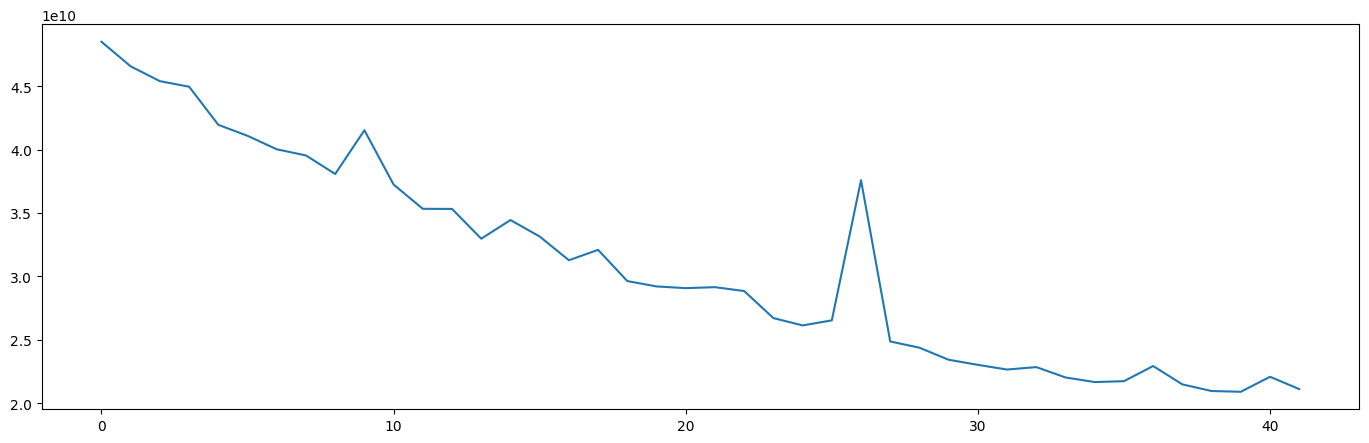

[KL: 154976.88] [MSE:  3360855.50]:  42%|▍| 40187/94700 [2:21:33<3:07:17,  4.85i

In [ ]:
epochs = 100
losses = []
with tqdm(total=epochs*len(dataloader), desc=f"[KL: ?] [MSE: ?]") as pbar:
    fids = []
    best_loss = np.inf
    for epoch in range(1, epochs + 1):
        loss = train(pbar, model, optimizer)
        losses.append(loss)
        
        with torch.no_grad():
            clear_output()
            sample = model.sample(1).numpy(force=True)
            ipd.Audio(data=sample[0, 0], rate=44100)
            np.save('/home/koltochenkoja/GEN/generative_project/logs/generated/epoch'+str(epoch), sample)
            if loss < best_loss:
                torch.save(model, "/home/koltochenkoja/GEN/generative_project/logs/model#"+str(epoch))
                best_loss = loss
            plt.plot(losses)
            plt.show()

In [46]:
sample = model.sample(1).numpy(force=True)
ipd.Audio(data=sample[0, 0], rate=44100)

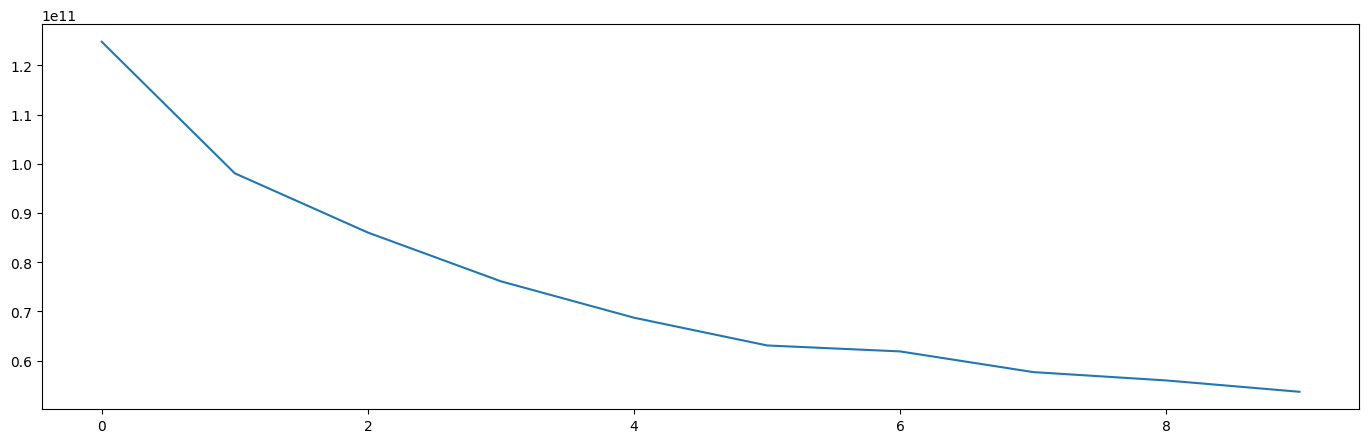

In [49]:
plt.plot(losses)